Get data ready--> build a model ->Fitting the model to data ->
Making predictions and evaluating -> saving and loading a model -> putting all together

In [ ]:
import torch
from torch import nn #nn contains all pytorch's building bloacks for neural network
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

here first we create data , simple straight line data with known parameters.

In [ ]:
weight = 0.6
bias   = 0.4

start = 0
end   = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]))

Splitting data into training and testing set.

In [ ]:
mark = int(0.8 *len(X))

X_train, y_train = X[:mark], y[:mark]
X_test, y_test = X[mark:], y[mark:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualizing our data

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c = "b",s = 4, label = "Training data")

  plt.scatter(test_data, test_label, c="g", s=4, label ="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "predictions")

  plt.legend(prop={"size": 14});



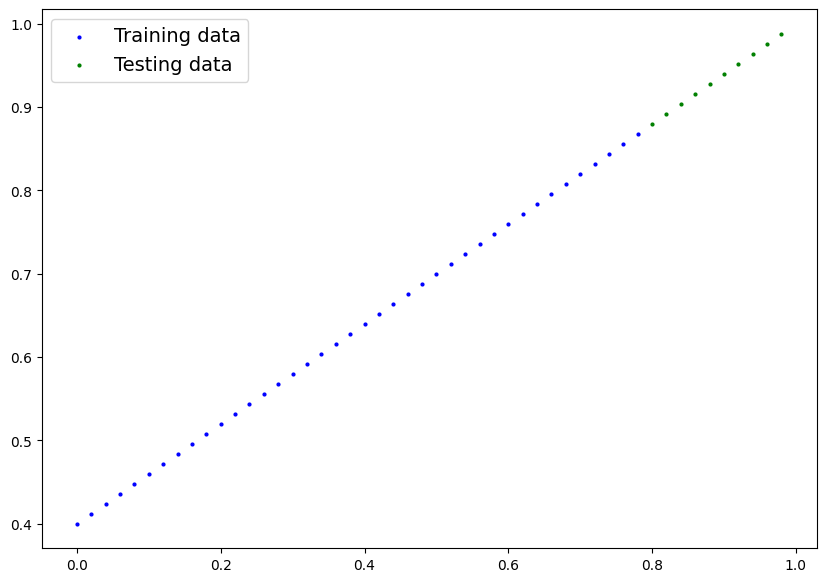

In [ ]:
plot_predictions();

Building a model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # starting with random weights
                                            dtype = torch.float),
                                requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype = torch.float),
                             requires_grad = True)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [ ]:
torch.manual_seed(42)

model_00 = LinearRegressionModel()

list(model_00.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_00.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_00(X_test)

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of prediction samples: {len(y_preds)}")
print(f"Predicted values:\n {y_preds}")


Number of testing samples: 10
Number of prediction samples: 10
Predicted values:
 tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


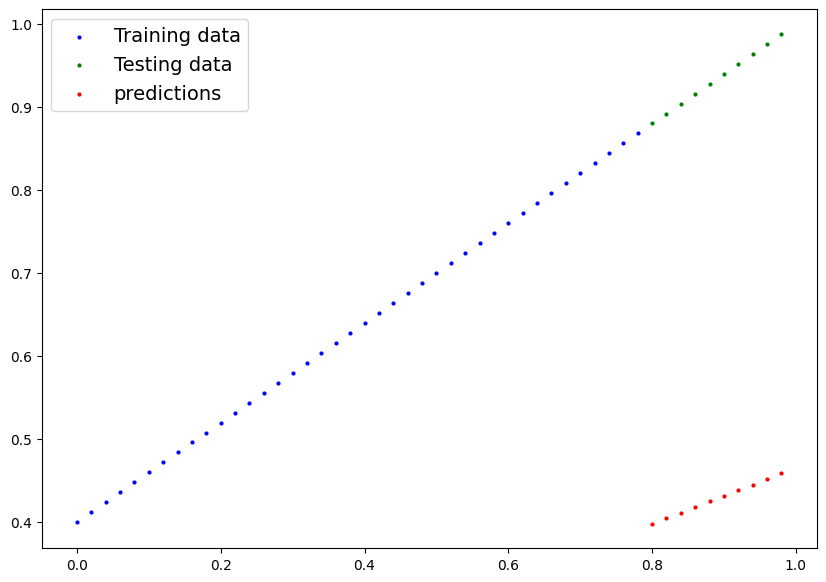

In [ ]:
plot_predictions(predictions = y_preds) # these predictions are from randomly selected parameters that is why so much difference is observed.

Train the model

In [ ]:
loss_fn = nn.L1Loss() #MAE mean absolute error
optimizer = torch.optim.SGD(params = model_00.parameters(),
                            lr = 0.01) # learning rate

In [ ]:
torch.manual_seed(42)
epochs = 110

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  # putting model in training mode
  model_00.train()

  #forward pass
  y_preds = model_00(X_train)

  #calculate the loss
  loss = loss_fn(y_preds, y_train)

  #zero grad of the optimizer
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #progress the optimizer
  optimizer.step()


  # testing mode
  #putting model in testing mode

  model_00.eval()
  with torch.inference_mode():
    #forward pass
    test_pred = model_00(X_test)

    #calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # in between observation
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch:{epoch} |MAE train loss:{loss} | MAE test loss:{test_loss}")




Epoch:0 |MAE train loss:0.362360417842865 | MAE test loss:0.47859421372413635
Epoch:10 |MAE train loss:0.24715033173561096 | MAE test loss:0.3438841998577118
Epoch:20 |MAE train loss:0.13194043934345245 | MAE test loss:0.20917436480522156
Epoch:30 |MAE train loss:0.034474022686481476 | MAE test loss:0.08993455767631531
Epoch:40 |MAE train loss:0.023463983088731766 | MAE test loss:0.0558253638446331
Epoch:50 |MAE train loss:0.019974401220679283 | MAE test loss:0.04617908596992493
Epoch:60 |MAE train loss:0.01654384285211563 | MAE test loss:0.03790653869509697
Epoch:70 |MAE train loss:0.013105037622153759 | MAE test loss:0.02963399887084961
Epoch:80 |MAE train loss:0.009672463871538639 | MAE test loss:0.022048329934477806
Epoch:90 |MAE train loss:0.006240235175937414 | MAE test loss:0.013775813393294811
Epoch:100 |MAE train loss:0.002801422728225589 | MAE test loss:0.005503260996192694


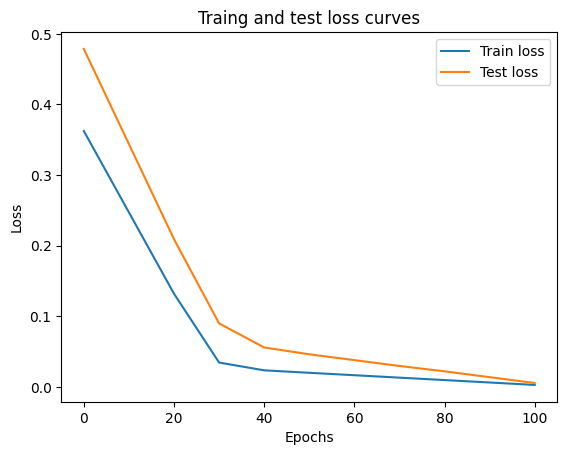

In [ ]:
# plotting the loss curves
plt.plot(epoch_count,train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Traing and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
print("Model_00 learned the following values for weight and bias")
print(model_00.state_dict())
print("\n And the original values for weight and bias")
print(f"weight: {weight}, bias: {bias}")


Model_00 learned the following values for weight and bias
OrderedDict({'weights': tensor([0.5950]), 'bias': tensor([0.3988])})

 And the original values for weight and bias
weight: 0.6, bias: 0.4


Now we try the same thing for 200 epoch

In [ ]:
torch.manual_seed(42)
model_001 = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_001.parameters(),
                            lr = 0.01)

epochs = 200

train_loss_values1 = []
test_loss_values1 =[]
epoch_count1 =[]

for epoch in range(epochs):
  #training mode
  model_001.train()
  y_pred = model_001(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  #testing
  model_001.eval()
  with torch.inference_mode():
    test_pred = model_001(X_test)
    test_loss = loss_fn(test_pred,y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count1.append(epoch)
      train_loss_values1.append(loss.detach().numpy())
      test_loss_values1.append(test_loss.detach().numpy())
      print(f"Epoch:{epoch} |MAE train loss:{loss} | MAE test loss:{test_loss}")



Epoch:0 |MAE train loss:0.37388134002685547 | MAE test loss:0.4920651316642761
Epoch:10 |MAE train loss:0.2586713433265686 | MAE test loss:0.3573552668094635
Epoch:20 |MAE train loss:0.1434614360332489 | MAE test loss:0.2226453274488449
Epoch:30 |MAE train loss:0.03848728537559509 | MAE test loss:0.09741605818271637
Epoch:40 |MAE train loss:0.023863982409238815 | MAE test loss:0.05760536342859268
Epoch:50 |MAE train loss:0.02031884901225567 | MAE test loss:0.04659420996904373
Epoch:60 |MAE train loss:0.01688215509057045 | MAE test loss:0.039008546620607376
Epoch:70 |MAE train loss:0.013453716412186623 | MAE test loss:0.030736004933714867
Epoch:80 |MAE train loss:0.010015235282480717 | MAE test loss:0.02246345952153206
Epoch:90 |MAE train loss:0.0065802233293652534 | MAE test loss:0.01487780176103115
Epoch:100 |MAE train loss:0.003150416072458029 | MAE test loss:0.006605249829590321
Epoch:110 |MAE train loss:0.008361521176993847 | MAE test loss:0.005684256553649902
Epoch:120 |MAE train 

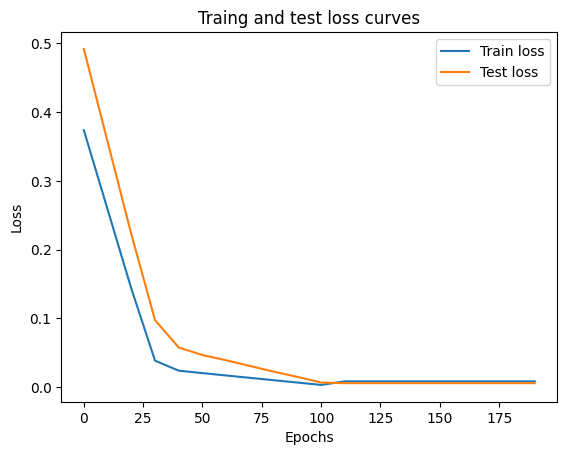

In [ ]:
# plotting the loss curves
plt.plot(epoch_count,train_loss_values1, label = "Train loss")
plt.plot(epoch_count, test_loss_values1, label = "Test loss")
plt.title("Traing and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
print(f"model 2 parameters : {model_001.state_dict()} ")
print(f"model 1 parameters : {model_00.state_dict()} ")


model 2 parameters : OrderedDict({'weights': tensor([0.5989]), 'bias': tensor([0.4088])}) 
model 1 parameters : OrderedDict({'weights': tensor([0.5950]), 'bias': tensor([0.3988])}) 


making predictions with our trained model which is also called performing inference with model.
Three things are needed to be done
1) set the model in evaluation mode.

2)make predictions using inference mode the context manager ( with torch.inference_mode():  )

3)all predictions should be made with objects on the same device.

In [ ]:
model_00.eval()

with torch.inference_mode():
  y_preds = model_00(X_test)

y_preds

tensor([[0.8748],
        [0.8867],
        [0.8986],
        [0.9105],
        [0.9224],
        [0.9343],
        [0.9462],
        [0.9581],
        [0.9700],
        [0.9819]])

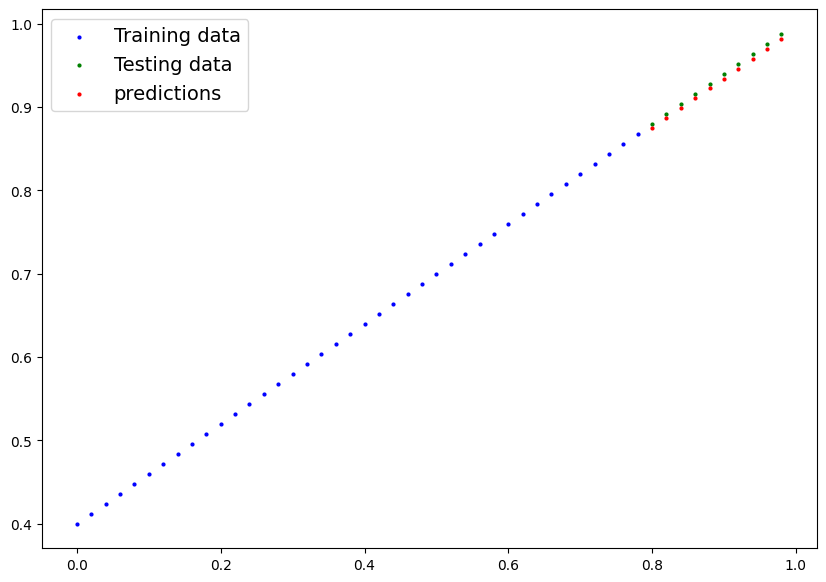

In [ ]:
plot_predictions(predictions = y_preds)

Saving and loading a PyTorch model.

In [ ]:
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# create model save path
MODEL_NAME = "lin_reg_pytorch_model_00.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj = model_00.state_dict(),
           f= MODEL_SAVE_PATH)


saving model to :models/lin_reg_pytorch_model_00.pth


In [ ]:
#checking save file path
!ls -l models/lin_reg_pytorch_model_00.pth

-rw-r--r-- 1 root root 2093 Nov 15 22:16 models/lin_reg_pytorch_model_00.pth


Loading a saved pytorch model

In [ ]:
loaded_model_00 = LinearRegressionModel()

loaded_model_00.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

Testing the loaded model


In [ ]:
# putting the loaded model in eval mode
loaded_model_00.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_00(X_test)

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

In [ ]:
# setting up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device} ")


Using device: cuda 


In [ ]:
# data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X= torch.arange(start,end, step).unsqueeze(dim = 1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# data splitting
mark = int(0.8*len(X))
X_train, y_train = X[:mark], y[:mark]
X_test, y_test = X[mark:], y[mark:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [ ]:
def plot_predictions2(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c = "b",s = 4, label = "Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label ="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "predictions")

  plt.legend(prop={"size": 14});




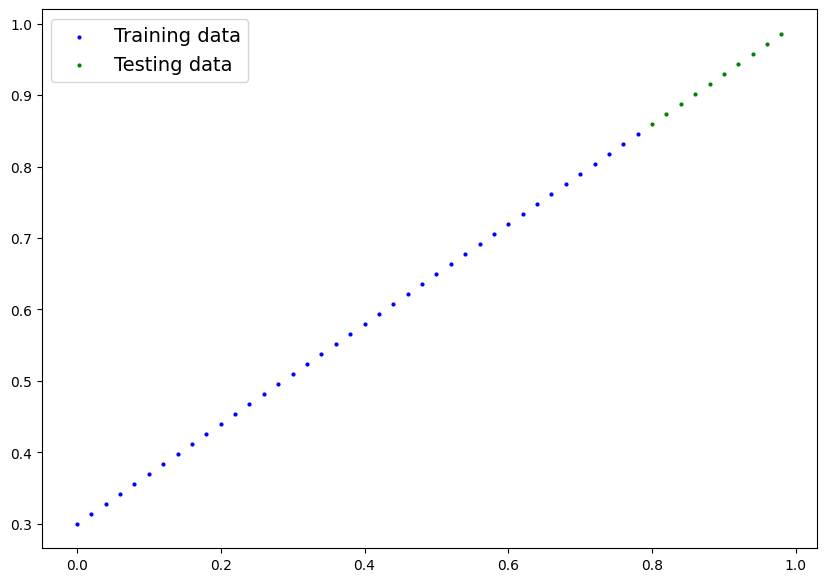

In [ ]:
plot_predictions2(X_train,y_train, X_test, y_test)

In [ ]:
# building a pytorch linear model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


torch.manual_seed(42)
model_v2_00 = LinearRegressionModelV2()
model_v2_00 , model_v2_00.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_v2_00.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_v2_00.to(device)
next(model_v2_00.parameters()).device

device(type='cuda', index=0)

In [ ]:
#training
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_v2_00.parameters(),
                            lr = 0.01)


In [ ]:
torch.manual_seed(42)
epochs = 1000

#since model is on cuda , we also need to put our data on same as model that is cuda
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_v2_00.train()
  y_pred = model_v2_00(X_train)
  loss =loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## testing
  model_v2_00.eval()
  with torch.inference_mode():
    test_pred = model_v2_00(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10 == 0 :
    print(f"EPoch:{epoch} | Train loss : {loss} | Test loss: {test_loss}")



EPoch:0 | Train loss : 0.5551779866218567 | Test loss: 0.5739762187004089
EPoch:10 | Train loss : 0.439968079328537 | Test loss: 0.4392664134502411
EPoch:20 | Train loss : 0.3247582018375397 | Test loss: 0.30455657839775085
EPoch:30 | Train loss : 0.20954833924770355 | Test loss: 0.16984669864177704
EPoch:40 | Train loss : 0.09433845430612564 | Test loss: 0.03513690456748009
EPoch:50 | Train loss : 0.023886388167738914 | Test loss: 0.04784907028079033
EPoch:60 | Train loss : 0.019956795498728752 | Test loss: 0.045803118497133255
EPoch:70 | Train loss : 0.016517987474799156 | Test loss: 0.037530567497015
EPoch:80 | Train loss : 0.013089174404740334 | Test loss: 0.02994490973651409
EPoch:90 | Train loss : 0.009653178043663502 | Test loss: 0.02167237363755703
EPoch:100 | Train loss : 0.006215683650225401 | Test loss: 0.014086711220443249
EPoch:110 | Train loss : 0.00278724217787385 | Test loss: 0.005814164876937866
EPoch:120 | Train loss : 0.0012645035749301314 | Test loss: 0.013801801018

In [ ]:
from pprint import pprint
print("The model learned the following values for weights and bias")
pprint(model_v2_00.state_dict())
print("\n And the original values for weights and bias")
print(f"weight: {weight}, bias:{bias}")


The model learned the following values for weights and bias
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

 And the original values for weights and bias
weight: 0.7, bias:0.3


In [ ]:
# evaluating our model
model_v2_00.eval()
with torch.inference_mode():
  y_preds = model_v2_00(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

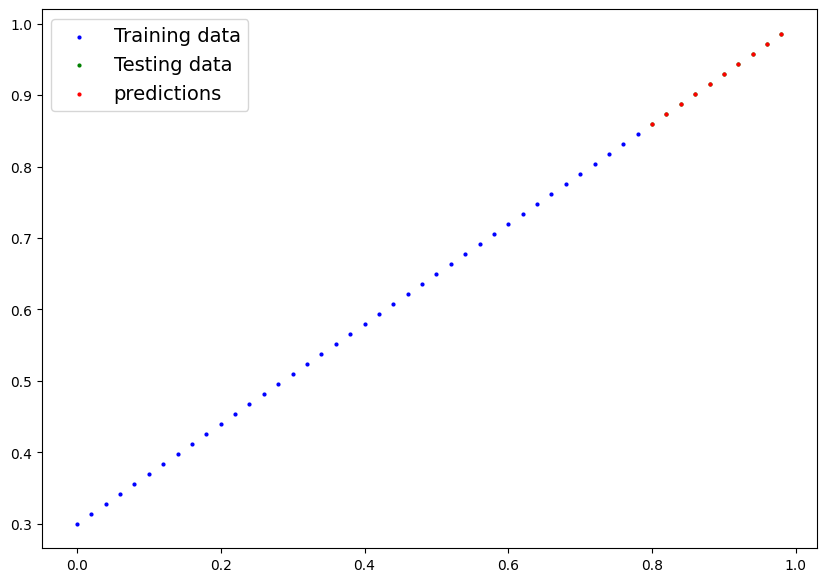

In [ ]:
plot_predictions2(predictions = y_preds.cpu())

In [ ]:
# saving and loading model
from pathlib import Path

MODEL_PATH = Path("models2")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "02_lin_reg_pytorch_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj = model_v2_00.state_dict(),
           f= MODEL_SAVE_PATH)


saving model to :models2/02_lin_reg_pytorch_model.pth


In [ ]:
#loading it back again
loaded_model_v2 = LinearRegressionModelV2()
loaded_model_v2.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_v2.to(device)
print(f"loaded model: {loaded_model_v2}")
print(f"Model on device: \n {next(loaded_model_v2.parameters()).device}")



loaded model: LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device: 
 cuda:0


In [ ]:
#evaluating our loaded model
loaded_model_v2.eval()
with torch.inference_mode():
  loaded_model_v2_pred = loaded_model_v2(X_test)

y_preds == loaded_model_v2_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')